In [49]:
#importing basic libraries 
import pandas as pd 
import numpy as np
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset
com=pd.read_csv("E:/DataSet/Company_Data.csv")
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
labelencoder=preprocessing.LabelEncoder()
com['Urban']=labelencoder.fit_transform(com['Urban'])
com['ShelveLoc']=labelencoder.fit_transform(com['ShelveLoc'])
com['US']=labelencoder.fit_transform(com['US'])
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


## EDA

In [5]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [6]:
com.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
ShelveLoc,400.0,1.307500,0.833475,0.0,1.00,2.00,2.00,2.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00
Urban,400.0,0.705000,0.456614,0.0,0.00,1.00,1.00,1.00


In [7]:
com.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

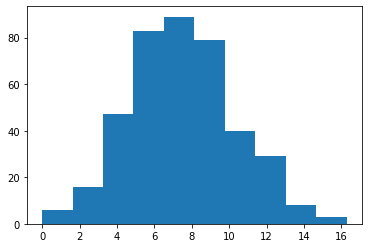

In [8]:
plt.hist(com.Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x231f7abb670>,
 'caps': [<matplotlib.lines.Line2D at 0x231f7abbd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x231f7abb310>],
 'medians': [<matplotlib.lines.Line2D at 0x231f7ac4430>],
 'fliers': [<matplotlib.lines.Line2D at 0x231f7ac4790>],
 'means': []}

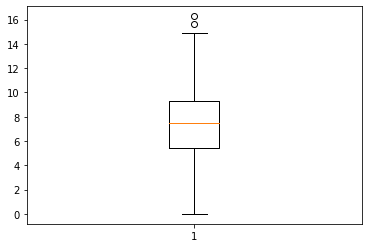

In [9]:
plt.boxplot(com.Sales)

In [10]:
com.Sales.median()

7.49

### Creating the logic for Decisions

In [11]:
for i in range(len(com.Sales)):
    if com.Sales[i] <com.Sales.median():
        com.Sales[i]=0 #lower sale
    else:
        com.Sales[i]=1 #higher sale

<ipython-input-11-6923bfba4d03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com.Sales[i]=1
<ipython-input-11-6923bfba4d03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com.Sales[i]=0


In [12]:
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,0,42,17,1,1
1,1.0,111,48,16,260,83,1,65,10,1,1
2,1.0,113,35,10,269,80,2,59,12,1,1
3,0.0,117,100,4,466,97,2,55,14,1,1
4,0.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1,33,14,1,1
396,1.0,139,23,3,37,120,2,55,11,0,1
397,1.0,162,26,12,368,159,2,40,18,1,1
398,1.0,100,79,7,284,95,0,50,12,1,1


In [16]:
com.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,0.8475,0.359955,0.0,1.00,1.0,1.0,1.0
CompPrice,400.0,124.9750,15.334512,77.0,115.00,125.0,135.0,175.0
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0
Advertising,400.0,6.6350,6.650364,0.0,0.00,5.0,12.0,29.0
Population,400.0,264.8400,147.376436,10.0,139.00,272.0,398.5,509.0
Price,400.0,115.7950,23.676664,24.0,100.00,117.0,131.0,191.0
ShelveLoc,400.0,1.3075,0.833475,0.0,1.00,2.0,2.0,2.0
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0
Education,400.0,13.9000,2.620528,10.0,12.00,14.0,16.0,18.0
Urban,400.0,0.7050,0.456614,0.0,0.00,1.0,1.0,1.0


In [17]:
x=com.iloc[:,1:] #independent variables
y=com['Sales'] #dependent variable

In [18]:
com.Sales.value_counts()

1.0    339
0.0     61
Name: Sales, dtype: int64

In [19]:
#splitting the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [20]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(688.8888888888889, 1321.25, 'Advertising <= 7.5\nentropy = 0.552\nsamples = 320\nvalue = [41, 279]\nclass = High Sales'),
 Text(344.44444444444446, 943.75, 'Price <= 92.5\nentropy = 0.701\nsamples = 179\nvalue = [34, 145]\nclass = High Sales'),
 Text(172.22222222222223, 566.25, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = High Sales'),
 Text(516.6666666666667, 566.25, 'CompPrice <= 115.5\nentropy = 0.759\nsamples = 155\nvalue = [34, 121]\nclass = High Sales'),
 Text(344.44444444444446, 188.75, 'entropy = 0.991\nsamples = 27\nvalue = [12, 15]\nclass = High Sales'),
 Text(688.8888888888889, 188.75, 'entropy = 0.662\nsamples = 128\nvalue = [22, 106]\nclass = High Sales'),
 Text(1033.3333333333335, 943.75, 'Age <= 57.5\nentropy = 0.285\nsamples = 141\nvalue = [7, 134]\nclass = High Sales'),
 Text(861.1111111111111, 566.25, 'entropy = 0.0\nsamples = 79\nvalue = [0, 79]\nclass = High Sales'),
 Text(1205.5555555555557, 566.25, 'Income <= 32.5\nentropy = 0.509\nsamples = 62\nva

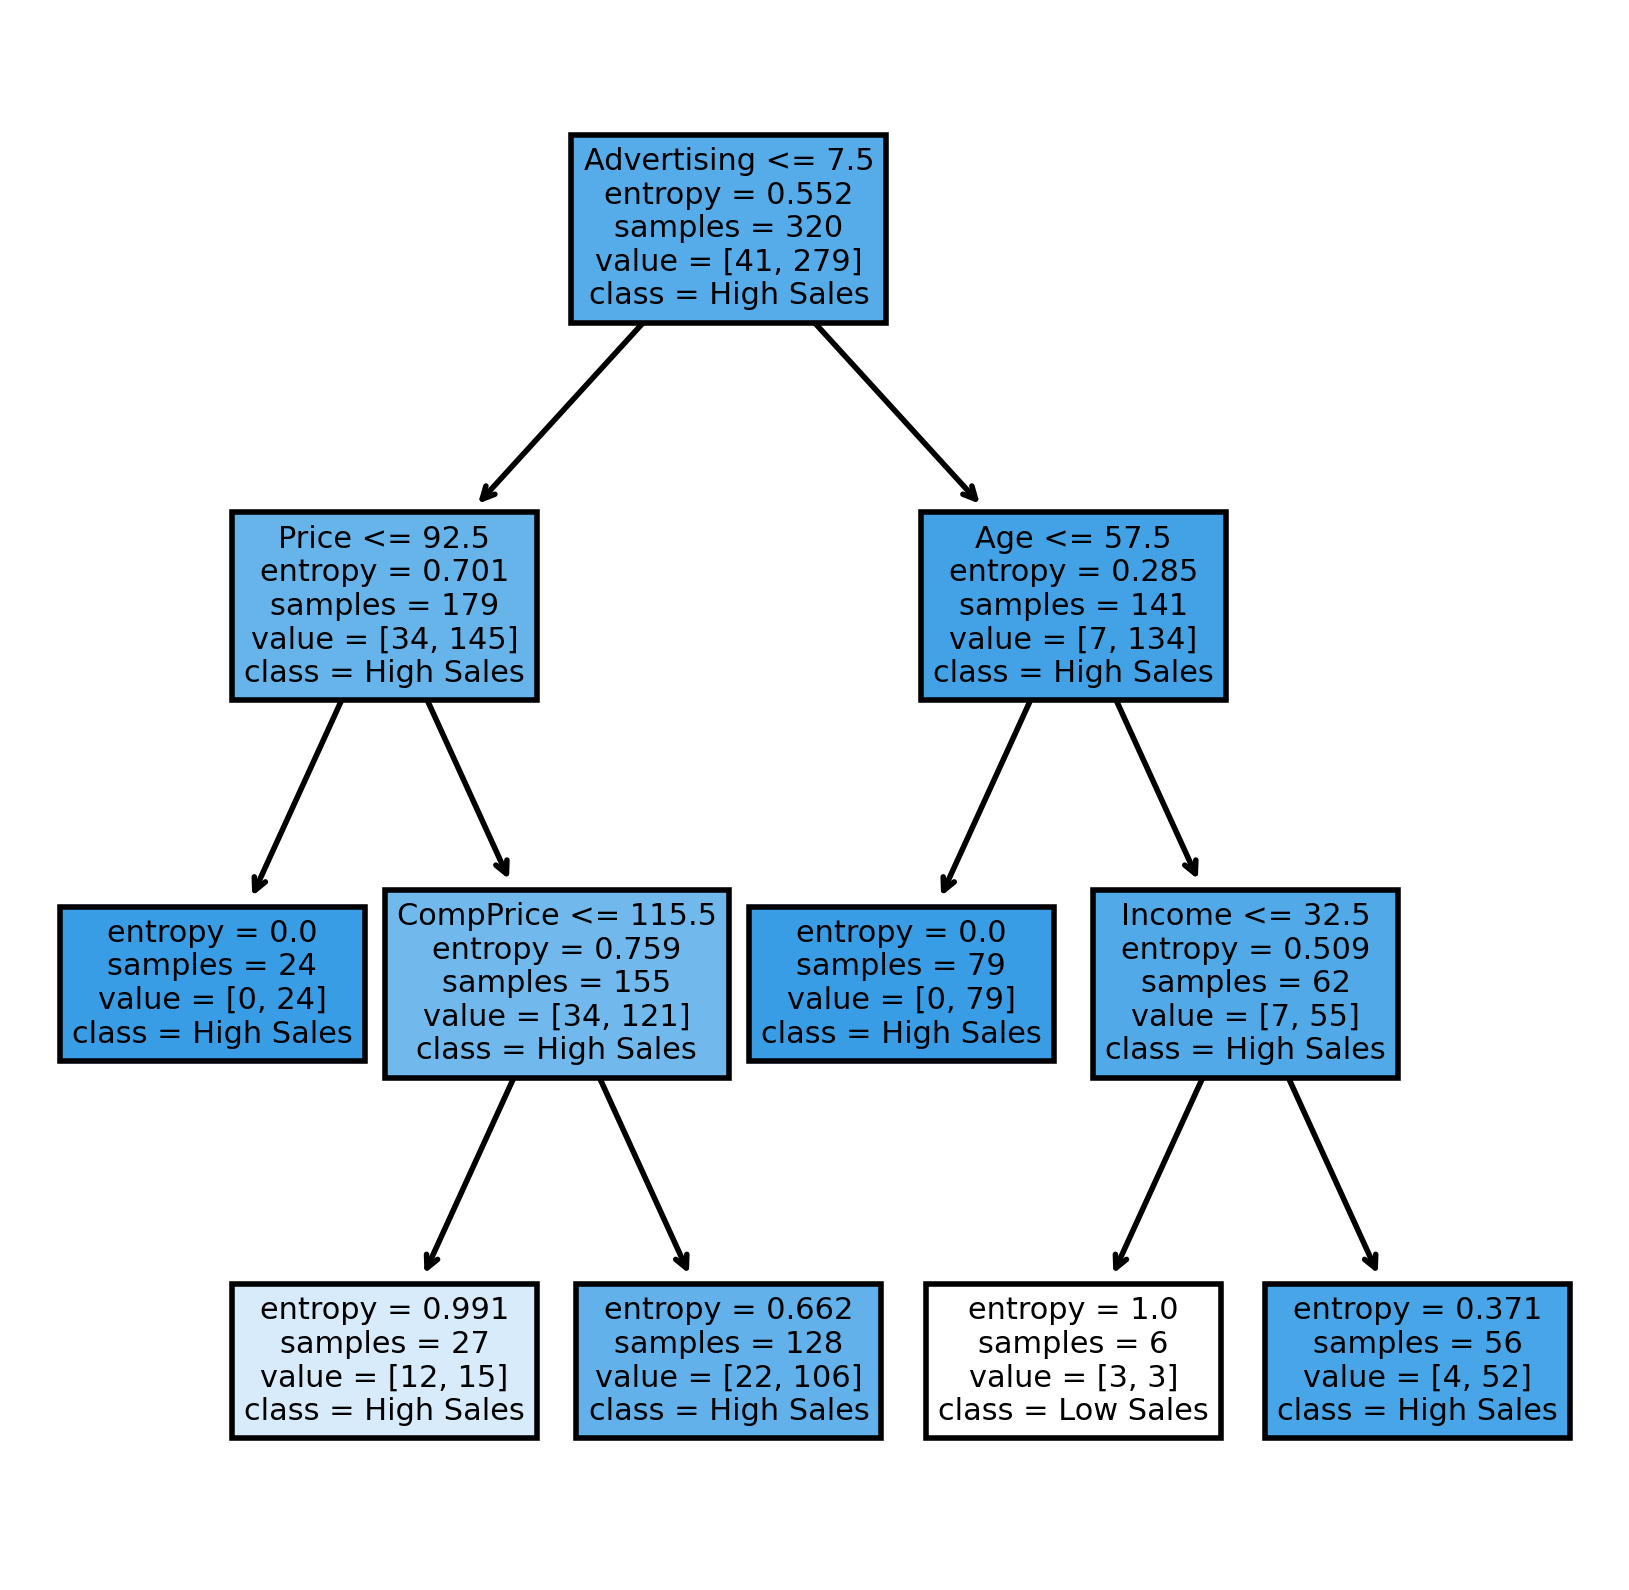

In [26]:
colnames=list(com.columns)
fn=colnames[1:]
cn=["Low Sales","High Sales"]
fig,axes=plt.subplots(figsize=(5,5),dpi=400)
tree.plot_tree(model1,
              feature_names=fn,
              class_names=cn,
              filled=True)

In [29]:
pred1=model1.predict(x_test)
pd.Series(pred1).value_counts()

1.0    79
0.0     1
dtype: int64

In [30]:
pd.crosstab(y_test,pred1)

col_0,0.0,1.0
Sales,,
0.0,0,20
1.0,1,59


In [36]:
acc1=np.mean(pred1==y_test)*100 #accuracy percentage
print("Accuracy= {}%".format(acc1))

Accuracy= 73.75%


In [43]:
imp_features1=pd.Series(model1.feature_importances_,index=fn).sort_values(ascending=False)
imp_features1

Advertising    0.286521
Age            0.224608
Price          0.205464
CompPrice      0.159991
Income         0.123415
US             0.000000
Urban          0.000000
Education      0.000000
ShelveLoc      0.000000
Population     0.000000
dtype: float64

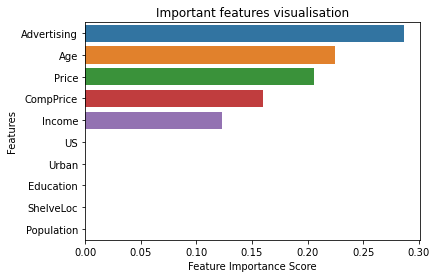

In [51]:
sns.barplot(x=imp_features1,y=imp_features1.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Important features visualisation")
plt.show()

Hence we can see the features that are important for classification of sales using the entropy criteria

### Building Decision Tree Classifier using Gini Criteira

In [52]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(1937.5, 3303.125, 'Advertising <= 7.5\ngini = 0.223\nsamples = 320\nvalue = [41, 279]\nclass = High Sales'),
 Text(968.75, 2359.375, 'Population <= 24.0\ngini = 0.308\nsamples = 179\nvalue = [34, 145]\nclass = High Sales'),
 Text(484.375, 1415.625, 'Age <= 62.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Low Sales'),
 Text(242.1875, 471.875, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = High Sales'),
 Text(726.5625, 471.875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Low Sales'),
 Text(1453.125, 1415.625, 'Price <= 175.5\ngini = 0.287\nsamples = 173\nvalue = [30, 143]\nclass = High Sales'),
 Text(1210.9375, 471.875, 'gini = 0.274\nsamples = 171\nvalue = [28, 143]\nclass = High Sales'),
 Text(1695.3125, 471.875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Low Sales'),
 Text(2906.25, 2359.375, 'Age <= 79.5\ngini = 0.094\nsamples = 141\nvalue = [7, 134]\nclass = High Sales'),
 Text(2421.875, 1415.625, 'Price <= 136.0\ngini = 0.071\nsamples = 136\nvalue = [

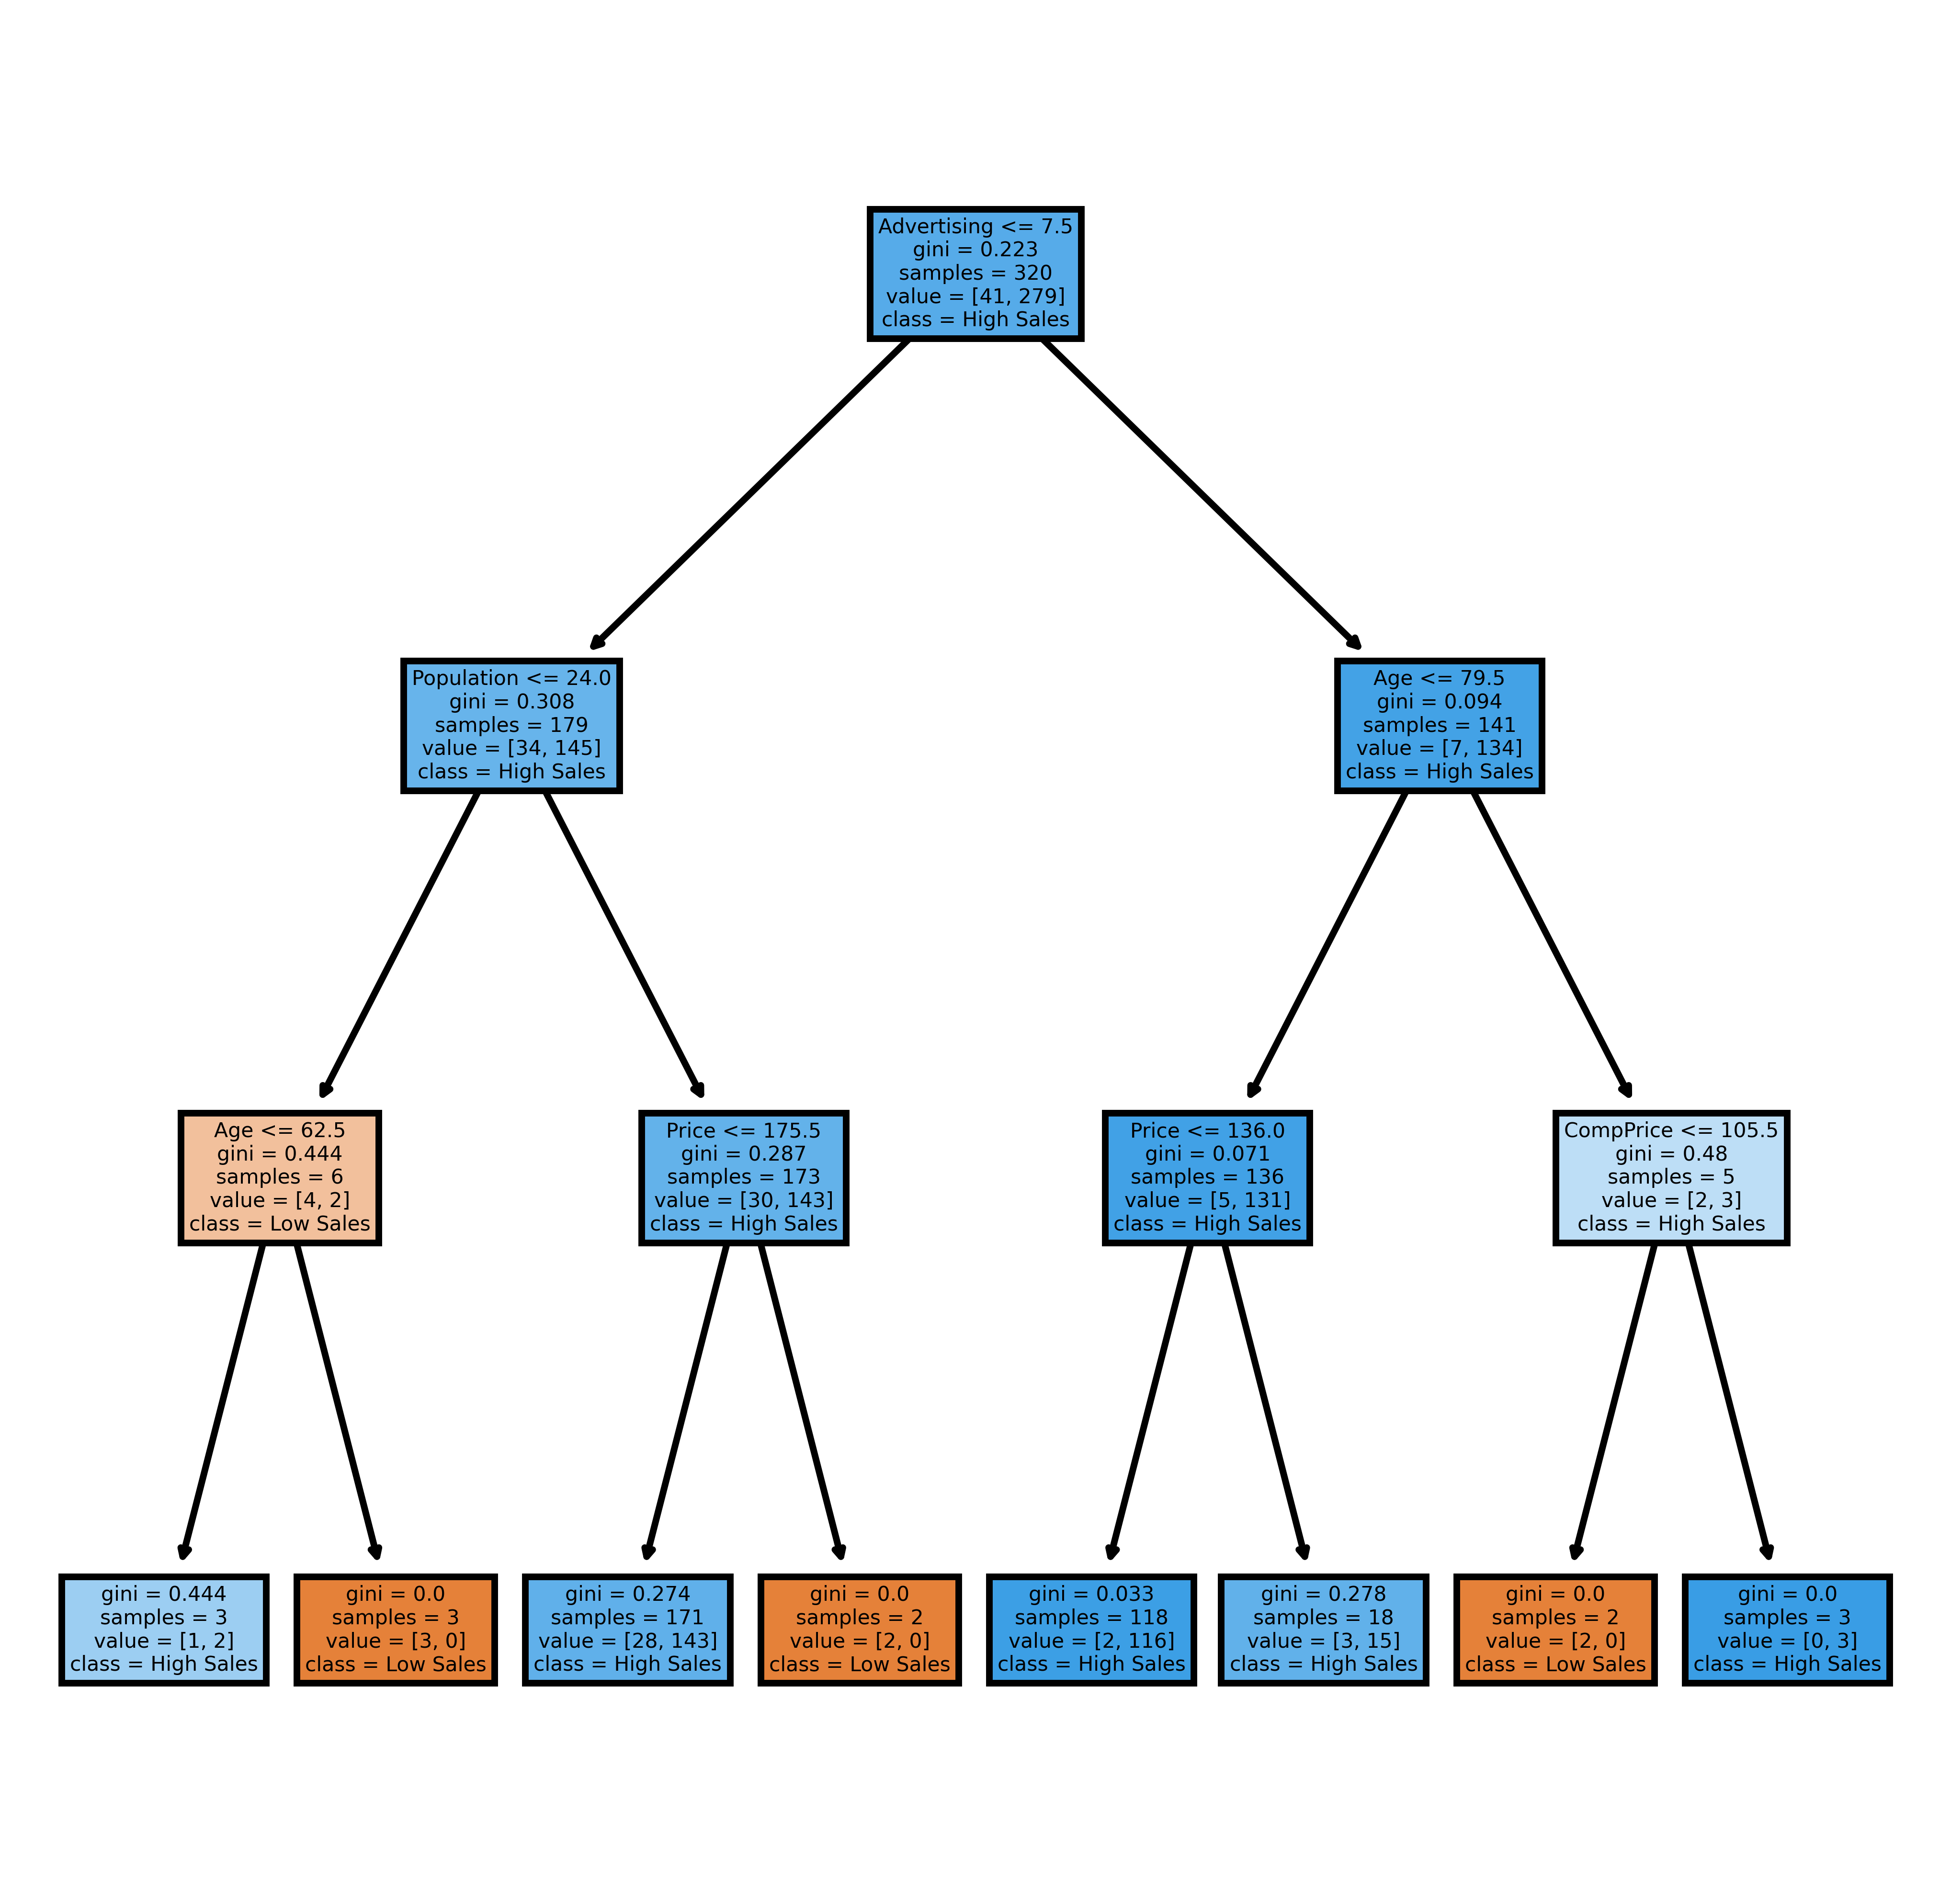

In [53]:
fig,axes=plt.subplots(figsize=(5,5),dpi=1000)
tree.plot_tree(model2,
              feature_names=fn,
              class_names=cn,
              filled=True)

In [54]:
#getting accuracy of the CART model
pred2=model2.predict(x_test)
print("accuracy= {}%".format(np.mean(pred2==y_test)*100)) 

accuracy= 75.0%


In [55]:
imp_features2=pd.Series(model2.feature_importances_,index=fn).sort_values(ascending=False)
imp_features2

Price          0.240670
Advertising    0.215657
Population     0.195985
Age            0.180996
CompPrice      0.166692
US             0.000000
Urban          0.000000
Education      0.000000
ShelveLoc      0.000000
Income         0.000000
dtype: float64

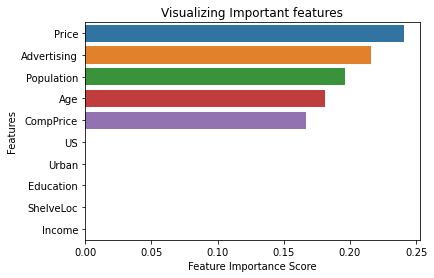

In [56]:
sns.barplot(x=imp_features2,y=imp_features2.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

##### Hence we can see that CART model gives a better accuracy than C5.0 model. The two most important features for the classification as predicted by the models are Price and Advertising.